In [27]:
from bs4 import BeautifulSoup
import requests
import time

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# I used this library to generate some headers so discogs would keep responding.
from user_agent import generate_user_agent
headers = {'User-Agent': generate_user_agent(device_type="desktop", os=('mac', 'linux'))}

# We are going to scrape the number of minimal techno albums on Discogs

Discogs has an API, but it didn't work for me, so I went for good old BeautifulSoup as discogs URLs are reactive to search terms and pagination.

The search 'minimal techno' in master releases yields some 23 pages for 5,523 results. The scraper below iterates through each page, and on said page iterates through the 250 results grabbing everything. 

I had to use some if/excepts for where year and country were missing. 

In [28]:
url_search = 'https://www.discogs.com/search/?layout=sm&style_exact=Minimal&style_exact=Techno&limit=250&genre_exact=Electronic&type=master&page='
mintechno = []
for n in range(23):
    raw_html = requests.get(url_search + str(n+1), headers=headers)
    time.sleep(1)
    print('-------------')
    soup_doc = BeautifulSoup(raw_html.content, 'html.parser')
    for album in soup_doc.findAll(class_='card_info'):
        print('~~~')
        mintechno_dict = {}
        mintechno_dict['artist'] = album.previous.previous.previous.previous.previous.previous.previous.previous.previous
        mintechno_dict['album'] = album.previous.previous.previous.previous.previous.previous
        mintechno_dict['label'] = album.find('a').string
        try:
            mintechno_dict['year'] = int(album.find(class_='card_release_year').string)
        except:
            mintechno_dict['year'] = None
        try:
            mintechno_dict['country'] = album.find(class_='card_release_country').string
        except:
            mintechno_dict['country'] = None
        mintechno.append(mintechno_dict)        

-------------
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~

-------------
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~

-------------
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~~
~~

In [29]:
len(mintechno)

5523

Great! Let's create a dataframe and save it to a csv before we clean it up a bit.

In [30]:
df = pd.DataFrame(mintechno)
df.to_csv('mintechno.csv', index=False)

And read it in again (start here if you don't want to run the scraper).

In [32]:
df = pd.read_csv('mintechno.csv')
df.head()

,album,artist,country,label,year
0,Freak By Night,Cotumo,Germany,Zerinnerung,2006.0
1,Progress,Alexander Kowalski,Germany,Kanzleramt,2002.0
2,Cocoon Compilation I,Various,Germany,Cocoon Recordings,2009.0
3,Welcome To My Club - 1st Issue,Secret Cinema,Netherlands,Gem Records (6),2010.0
4,Time Axis Manipulation,Mokira,Sweden,Kontra-Musik,2011.0


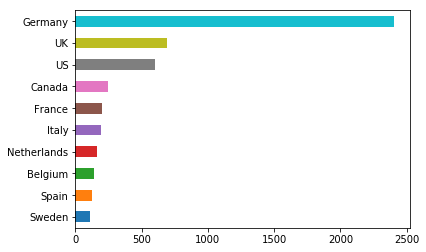

In [33]:
df.country.value_counts().head(10).sort_values().plot(kind='barh', x='country')

In [36]:
df.year = df.year.astype(str) #Doint this to deal with the None values.

In [37]:
df.dtypes

album      object
artist     object
country    object
label      object
year       object
dtype: object

In [39]:
df.year = df.year.apply(lambda x: x[:-2]) #getting rid of .0

In [40]:
df.year.value_counts()

2007    729
2008    690
2009    592
2006    546
2010    349
2011    282
2005    245
2002    186
2001    183
2000    182
2012    172
2004    153
1999    153
1997    151
1998    139
1996    125
2013    118
2003    110
1995     81
2016     74
2014     69
2015     60
2017     44
1994     34
1993     18
2018     15
n        14
1992      5
1990      2
1991      2
Name: year, dtype: int64

Okay we have 14 values of 'n' for now, let's just replace those with 0.

In [41]:
df.year = df.year.str.replace('n', '0')

In [42]:
df.year.value_counts()

2007    729
2008    690
2009    592
2006    546
2010    349
2011    282
2005    245
2002    186
2001    183
2000    182
2012    172
2004    153
1999    153
1997    151
1998    139
1996    125
2013    118
2003    110
1995     81
2016     74
2014     69
2015     60
2017     44
1994     34
1993     18
2018     15
0        14
1992      5
1990      2
1991      2
Name: year, dtype: int64

And let's convert the years to integers:

In [43]:
df.year = df.year.astype('int')
df.dtypes

album      object
artist     object
country    object
label      object
year        int64
dtype: object

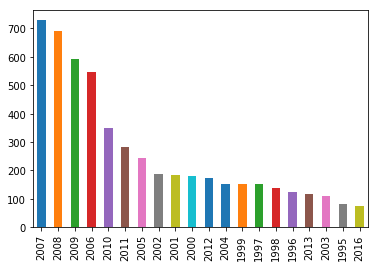

In [44]:
df.year.value_counts().head(20).plot(kind='bar')

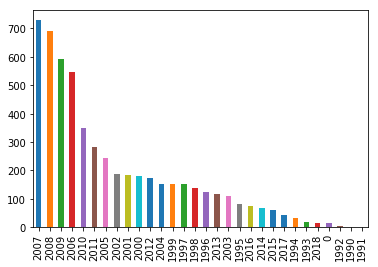

In [45]:
df.year.value_counts().plot(kind='bar', sort_columns=True)

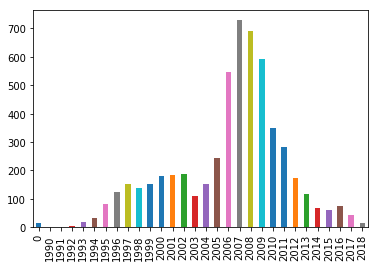

In [46]:
df.year.value_counts().sort_index().plot(kind='bar')

Okay, enough preliminary poking around. I'm saving the cleaned version to a new csv, head on over to the 2nd notebook.

In [47]:
df.to_csv('mintechno2.csv', index=False)